# Assessment

We would like to study correlations. In order to study them, we use a basic visualization tool -- the heatmap. Use the the heatmap to understand correlations between features in the Pima Indians Diabetes dataset which contains information on  female patients all at least 21 years of age and of Pima Indian heritage. The population lives near Phoenix, Arizona, USA. The data set was collected to forecast the onset of diabetes mellitus. The following is the information the columns in the dataset:
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1), i.e., (class value 1 is interpreted as "tested positive for diabetes")

## The dataset has no column headings so use the information given about the columns above to create column headings.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from scipy.stats import pearsonr 

In [2]:
%matplotlib inline

In [6]:
data = pd.read_csv('pima-indians-diabetes.csv', sep=',', 
                   names = ['Number of times pregnant', 'Plasma glucose tolerance test', 'Diastolic blood pressure', 'Triceps skin fold thickness', '2-Hour Serum Insulin', 'BMI', 'Diabetes pedigree function', 'Age', 'Class variable'])
data.shape

(768, 9)

A: Looking at the shape of the dataset, there are 768 rows with 9 columns

In [10]:
data.head()

,Number of times pregnant,Plasma glucose tolerance test,Diastolic blood pressure,Triceps skin fold thickness,2-Hour Serum Insulin,BMI,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Number of times pregnant,Plasma glucose tolerance test,Diastolic blood pressure,Triceps skin fold thickness,2-Hour Serum Insulin,BMI,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Find any missing values in the data.

#### Counting cells with missing values:

In [15]:
sum(data.isnull().values.ravel())

0

A: Looking at the dataset and using Python I can tell that there is no missing values in the data. 

#### Counting rows that have missing values somewhere:

In [16]:
sum([True for idx,row in data.iterrows() if any(row.isnull())])

0

A: Just to confirm that thier is no missing data

## Visualize the correlation matrix

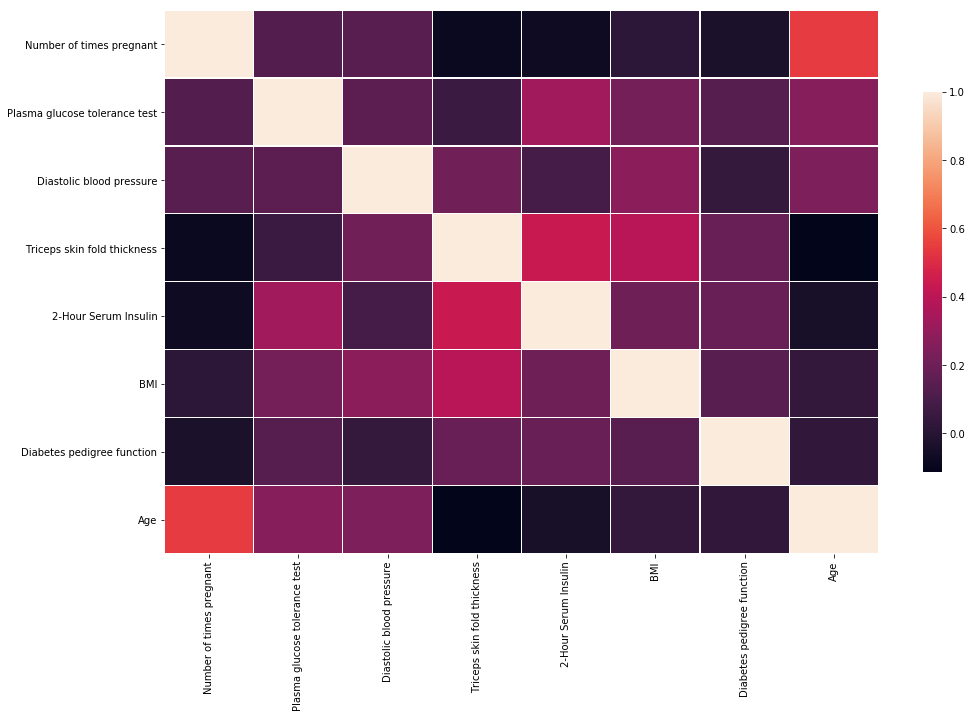

In [19]:
corr = data.corr()
pyplot.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, linewidths=.08,                   
            cbar_kws={"shrink": .7})           

## Interpreting the results

Notice that 'Class' is a categorical variable. Let's drop it for now.

In [7]:
data.drop('Class variable', axis=1, inplace = True)
data.head()

,Number of times pregnant,Plasma glucose tolerance test,Diastolic blood pressure,Triceps skin fold thickness,2-Hour Serum Insulin,BMI,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
data.corr()

,Number of times pregnant,Plasma glucose tolerance test,Diastolic blood pressure,Triceps skin fold thickness,2-Hour Serum Insulin,BMI,Diabetes pedigree function,Age
Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Plasma glucose tolerance test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
Diastolic blood pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
Triceps skin fold thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
2-Hour Serum Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Now let's find those features that are highly correlated. Visually pick out the highly correlated features or write code to find the highly correlated features.

# Taking a look at Age vs. Number of pregnancies

(0.544341228402339, 1.8628128328631655e-60)


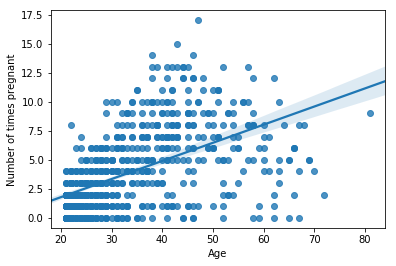

In [9]:
sns.regplot(data['Age'], data['Number of times pregnant'])
print(stats.pearsonr(data['Age'], data['Number of times pregnant']))

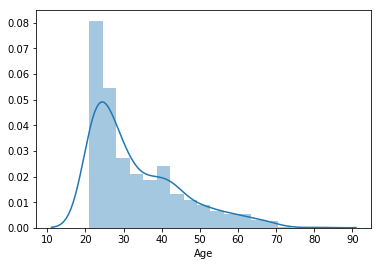

In [38]:
sns.distplot(data['Age'])

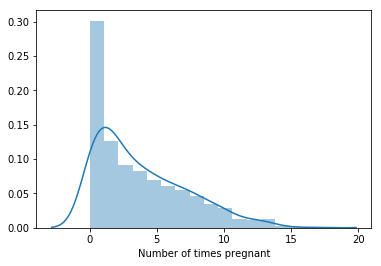

In [11]:
sns.distplot(data['Number of times pregnant'])

Using the above code, you identified sets of features that are highly correlated. Plot them using a scatterplot and discuss your findings.

A: Looking at the scatter plot and the histograms of 'Age' vs. 'Nunmber of pregnancies' you can tell that there is a strong correlation to the high number of pregnancies with woman in their 20's

In [10]:
r,p = stats.pearsonr(data['Age'], data['Number of times pregnant'])
print 'r', r
print 'p', p

r 0.544341228402339
p 1.8628128328631655e-60


A: When calculating the rank-order r is 0.54 witch to me means that we have an ok correlation

# Looking at Age vs. Diabetes

(0.03356131243480553, 0.35297973366701474)


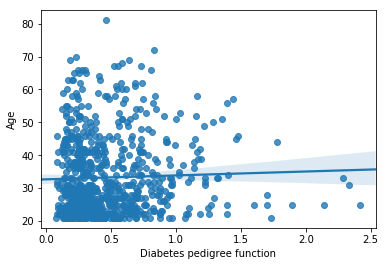

In [15]:
sns.regplot(data['Diabetes pedigree function'], data['Age'])
print(stats.pearsonr(data['Diabetes pedigree function'], data['Age']))

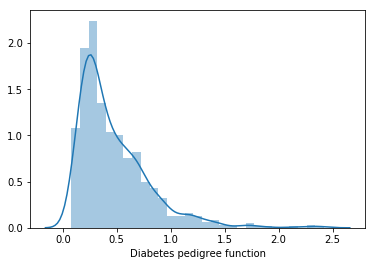

In [17]:
sns.distplot(data['Diabetes pedigree function'])

In [18]:
r,p = stats.pearsonr(data['Age'], data['Diabetes pedigree function'])
print 'r', r
print 'p', p

r 0.03356131243480553
p 0.35297973366701474


A: This is anoter surprisingly low corrolation between 'Age' vs. 'Diabetes'